<a href="https://colab.research.google.com/github/dlee1982/audit_accounting/blob/main/Vendor_Invoices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.maine.gov/osc/administration/data-share

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# obtain all the excel vendor file names
files = os.listdir(r"D:\09. Personal Articles\AP Articles\Maine\Data")
file_path = "D:\\09. Personal Articles\\AP Articles\\Maine\\Data"

In [ ]:
def read_files(file_name): 
    """
    read in the workbooks individual worksheets and combine into one csv file
    """
    
    #reads in the current workbook and all the worksheets into a dictionary
    cur_read_file = pd.read_excel(file_path + "\\" + file_name, sheet_name=None)
    combined_file = pd.DataFrame()
    
    #reads in each worksheets and combines into one workbook
    for sheet in cur_read_file: 
        cur_sheet = cur_read_file[f'{sheet}']
        combined_file = pd.concat([cur_sheet, combined_file])
        
    return combined_file 

In [ ]:
# read in FY2016 vendor data 
fy2016 = read_files(files[0])

In [ ]:
fy2016.head() # let's look at the first 5 rows of the FY2016 data

,DEPT CODE,FY,FUND,DEPT NAME,NAME,ALIAS,ADDRESS1,ADDRESS2,CITY,ST,ZIP,OBJ,OBJECT NAME,AMOUNT
0,95F,2016,10,MAINE COMMISSION ON INDIGENT L,64 STATE ST LLC,NaN,C/O STEPHEN J BOURGET ESQ,64 STATE ST,AUGUSTA,ME,04330,4040,COURT APPOINTED ATTORNEYS,102993.24
1,95F,2016,10,MAINE COMMISSION ON INDIGENT L,"A-V TRONICS, INC",AVTRANZ,7227 NORTH 16TH ST SUITE 207,NaN,PHOENIX,AZ,85020,4930,TRANSCRIPTS,12630.08
2,95F,2016,10,MAINE COMMISSION ON INDIGENT L,"A-V TRONICS, INC",AVTRANZ,845 N. 3RD AVE,NaN,PHOENIX,AZ,85003,4930,TRANSCRIPTS,18001.37
3,95F,2016,10,MAINE COMMISSION ON INDIGENT L,AARON FETHKE,NaN,,,,,,4040,COURT APPOINTED ATTORNEYS,40426.50
4,95F,2016,10,MAINE COMMISSION ON INDIGENT L,AARON M FREY,NaN,,,,,,4040,COURT APPOINTED ATTORNEYS,55953.12


To learn more about the our imported vendor data, let's do some exploratory data analysis! 

In [ ]:
# how many rows of data are we dealing with 
fy2016.shape[0] 

71759

In [ ]:
# next, let's see the total number of different departments and how much they spent in FY 2016
(fy2016[['DEPT CODE', 'DEPT NAME']]
 .value_counts()
 .reset_index()
 .rename(columns={0: 'Total_Transactions'})
 .head(10))

,DEPT CODE,DEPT NAME,Total_Transactions
0,40A,JUDICIAL DEPT.,14323
1,10A,DEPT OF HUMAN SERVICES,13421
2,17A,TRANSPORTATION,6302
3,01A,AGRICULTURE,4904
4,16A,PUBLIC SAFETY,3061
5,09A,INLAND FISHERIES & WILDLIFE,2885
6,12A,DEPT. OF LABOR,1799
7,05A,DEPT OF EDUCATION,1766
8,30A,LEGISLATURE,1565
9,03A,CORRECTIONS,1460


In [ ]:
# so we see that the Judicial Department has the most transactions in FY2016. But let's see which department spent the most in dollars
(fy2016
 .groupby(['DEPT CODE', 'DEPT NAME'])
 .agg({'AMOUNT': 'sum'})
 .sort_values('AMOUNT', ascending=False)
 .reset_index()
 .head(10))

,DEPT CODE,DEPT NAME,AMOUNT
0,17A,TRANSPORTATION,4.112826e+08
1,10A,DEPT OF HUMAN SERVICES,1.377166e+08
2,18S,STATE EMPLOYEE HEALTH COMM,7.262436e+07
3,03A,CORRECTIONS,3.888984e+07
4,01A,AGRICULTURE,2.383807e+07
5,15A,DEFENSE VETERANS & EMERG MGMT,2.383438e+07
6,19A,ECONOMIC & COMM. DEV.,2.085268e+07
7,05A,DEPT OF EDUCATION,1.958439e+07
8,16A,PUBLIC SAFETY,1.894651e+07
9,40A,JUDICIAL DEPT.,1.889068e+07


In [ ]:
# let's merge the two dataframes so we can calculate the ratio of dollars to total number for transactions
total_trans = (fy2016[['DEPT CODE', 'DEPT NAME']]
 .value_counts()
 .reset_index()
 .rename(columns={0: 'Total_Transactions'}))
               
total_dollars = (fy2016
 .groupby(['DEPT CODE', 'DEPT NAME'])
 .agg({'AMOUNT': 'sum'})
 .sort_values('AMOUNT', ascending=False)
 .reset_index())

merged_df = total_trans.merge(total_dollars, on='DEPT CODE', suffixes=('_left', '_right'))

In [ ]:
merged_df.head() # displays the first 5 rows to make sure the merge executed correctly

,DEPT CODE,DEPT NAME_left,Total_Transactions,DEPT NAME_right,AMOUNT
0,40A,JUDICIAL DEPT.,14323,JUDICIAL DEPT.,1.889068e+07
1,10A,DEPT OF HUMAN SERVICES,13421,DEPT OF HUMAN SERVICES,1.377166e+08
2,17A,TRANSPORTATION,6302,TRANSPORTATION,4.112826e+08
3,01A,AGRICULTURE,4904,AGRICULTURE,2.383807e+07
4,16A,PUBLIC SAFETY,3061,PUBLIC SAFETY,1.894651e+07


In [ ]:
# calculates the ratio of total dollars to total transactions for each vendor
(merged_df
 .assign(Ratio = merged_df['AMOUNT']/merged_df['Total_Transactions'])
 .query('(Total_Transactions > 500) & (Ratio < 1000)')
 .sort_values('Ratio')
 .head(10))

,DEPT CODE,DEPT NAME_left,Total_Transactions,DEPT NAME_right,AMOUNT,Ratio
21,90C,WORKER'S COMPENSATION BOARD,689,WORKER'S COMPENSATION BOARD,449925.9,653.012917


In [ ]:
# based on our analysis, it appears that the Worker's Compensation Board, Department 90C, has the lowest ratio that has over 500 transactions
work_comp16 = fy2016[fy2016['DEPT CODE']== "90C"]
work_comp16.head()

,DEPT CODE,FY,FUND,DEPT NAME,NAME,ALIAS,ADDRESS1,ADDRESS2,CITY,ST,ZIP,OBJ,OBJECT NAME,AMOUNT
0,90C,2016,14,WORKER'S COMPENSATION BOARD,ACADIA FOOT & ANKLE PA,NaN,33 PENN PLAZA STE A,NaN,BANGOR,ME,04401,4095,MEDICAL REPORTS,150.00
1,90C,2016,14,WORKER'S COMPENSATION BOARD,ACADIA HOSPITAL,NaN,268 STILLWATER AVE,NaN,BANGOR,ME,04401,4095,MEDICAL REPORTS,15.35
2,90C,2016,14,WORKER'S COMPENSATION BOARD,ACUPUNCTURE & HERBAL CLINIC,C/O RENCHI ZHANG,4 SHEFFIELD ST,NaN,PORTLAND,ME,04102,4095,MEDICAL REPORTS,8.60
3,90C,2016,14,WORKER'S COMPENSATION BOARD,ADVANTAGE MEDICAL BILLING SOL.,NaN,C/O LINDA SACCO,387 LAFAYETTE RD SUITE 204/2,HAMPTON,NH,03842,4095,MEDICAL REPORTS,6.35
4,90C,2016,14,WORKER'S COMPENSATION BOARD,ALICE L YELL,NaN,,,,,,4881,ST SHARE LENSES VDT OPERATOR,150.00


In [ ]:
# let's try to understand why department 90C has the lowest ratio
work_comp16['NAME'].value_counts().head()

PAUL J FORTIER                    13
PAUL H SIGHINOLFI                 13
GORDON DAVIS                      11
CHRISTOPHER J COTNOIR             10
THOMAS J PELLETIER                 8
Name: NAME, dtype: int64

In [ ]:
work_comp16['OBJECT NAME'].value_counts().head()

MEDICAL REPORTS                   317
AUTO MILEAGE-GEN IN STATE          66
MEALS AND GRATUITIES               36
OTHER TRANSPORTATION               28
DUES                               27
Name: OBJECT NAME, dtype: int64

In [ ]:
work_comp16['OBJECT NAME'] = work_comp16['OBJECT NAME'].str.strip()
work_comp16[work_comp16['OBJECT NAME'] == "MEDICAL REPORTS"].head()

,DEPT CODE,FY,FUND,DEPT NAME,NAME,ALIAS,ADDRESS1,ADDRESS2,CITY,ST,ZIP,OBJ,OBJECT NAME,AMOUNT
0,90C,2016,14,WORKER'S COMPENSATION BOARD,ACADIA FOOT & ANKLE PA,NaN,33 PENN PLAZA STE A,NaN,BANGOR,ME,04401,4095,MEDICAL REPORTS,150.00
1,90C,2016,14,WORKER'S COMPENSATION BOARD,ACADIA HOSPITAL,NaN,268 STILLWATER AVE,NaN,BANGOR,ME,04401,4095,MEDICAL REPORTS,15.35
2,90C,2016,14,WORKER'S COMPENSATION BOARD,ACUPUNCTURE & HERBAL CLINIC,C/O RENCHI ZHANG,4 SHEFFIELD ST,NaN,PORTLAND,ME,04102,4095,MEDICAL REPORTS,8.60
3,90C,2016,14,WORKER'S COMPENSATION BOARD,ADVANTAGE MEDICAL BILLING SOL.,NaN,C/O LINDA SACCO,387 LAFAYETTE RD SUITE 204/2,HAMPTON,NH,03842,4095,MEDICAL REPORTS,6.35
5,90C,2016,14,WORKER'S COMPENSATION BOARD,ALLERGY & ASTHMA ASSOC OF ME,NaN,195 FORE RIVER PKWY SUITE 410,NaN,PORTLAND,ME,04102,4095,MEDICAL REPORTS,16.30


In [ ]:
work_comp = work_comp16['OBJECT NAME']
work_comp16[work_comp == "MEDICAL REPORTS"]['AMOUNT'].describe()

count     317.000000
mean      122.726309
std       351.400249
min       -32.500000
25%        14.050000
50%        29.750000
75%        72.600000
max      3222.600000
Name: AMOUNT, dtype: float64

<AxesSubplot:ylabel='Frequency'>

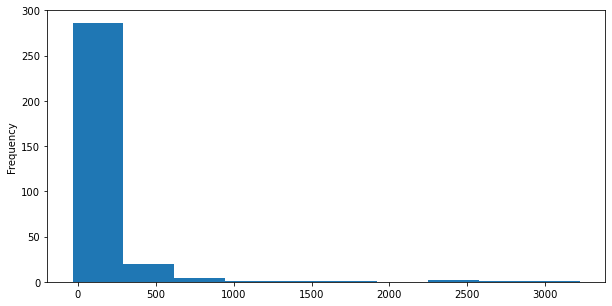

In [ ]:
work_comp16[work_comp == "MEDICAL REPORTS"]['AMOUNT'].plot(kind='hist', figsize=(10, 5))

<AxesSubplot:xlabel='AMOUNT', ylabel='FY'>

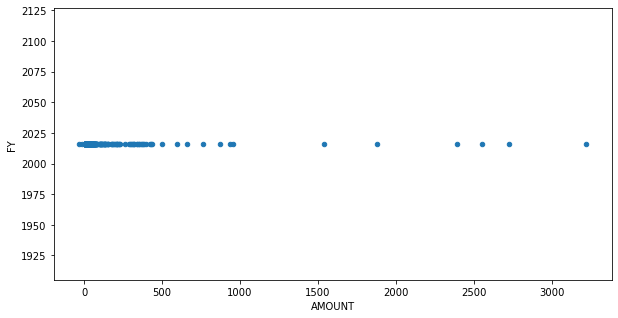

In [ ]:
work_comp16[work_comp == "MEDICAL REPORTS"].plot(kind='scatter', x='AMOUNT', y='FY', figsize=(10, 5))